In [1]:
from dotenv import load_dotenv
load_dotenv()
import os 
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
groq_api_key = os.getenv('GROQ_API_KEY')

In [ ]:
from langchain_groq import ChatGroq
model = ChatGroq(model="meta-llama/llama-4-maverick-17b-128e-instruct", api_key=groq_api_key)
model.invoke("who are you")

AIMessage(content="I'm an AI assistant designed by Meta. I'm here to answer your questions, share interesting ideas and maybe even surprise you with a fresh perspective. What's on your mind?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 13, 'total_tokens': 47, 'completion_time': 0.033072006, 'prompt_time': 0.00059311, 'queue_time': 0.282838236, 'total_time': 0.033665116}, 'model_name': 'meta-llama/llama-4-maverick-17b-128e-instruct', 'system_fingerprint': 'fp_7c27472e1f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--0881e4b7-cf50-4d39-9f21-f0ab0d23cea5-0', usage_metadata={'input_tokens': 13, 'output_tokens': 34, 'total_tokens': 47})

In [5]:
model.invoke("who are you").content

"I'm an AI assistant designed by Meta. I'm here to answer your questions, share interesting ideas and maybe even surprise you with a fresh perspective. What's on your mind?"

In [11]:
from typing_extensions import TypedDict
class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str

In [22]:
def generate(state:State):
    return {"story": model.invoke(f"Write a one sentence story premise about: {state['topic']}")}

def check_confict(state:State):
    if "?" in state['story'] or "!" in state['story']:
        return "Fail"
    else:
        return "Pass"

def improve(state:State):
    return {"improved_story": model.invoke(f"Enhance this story premise with vivid details:{state["story"]}. don't reply just give the content i asked")}

def polish(state:State):
    return {"final_story": model.invoke(f"Add an unexpected twist to this story premise:{state["improved_story"]}. don't reply just give the content i asked")}

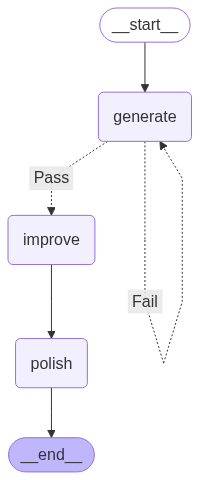

In [23]:
from langgraph.graph import StateGraph, START, END
builder = StateGraph(State)
# nodes
builder.add_node('generate', generate)
builder.add_node('improve', improve)
builder.add_node('polish', polish)

# edges
builder.add_edge(START, "generate")
builder.add_conditional_edges("generate", check_confict, {"Pass":"improve", "Fail":"generate"})
builder.add_edge("improve", "polish")
builder.add_edge("polish", END)

graph = builder.compile()

from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
direction = graph.invoke({"topic":"batman vs superman"})

In [25]:
direction['final_story'].content

"In a dark and gritty Gotham City, where the towering skyscrapers seemed to loom like specters over the narrow, rain-soaked streets, a power-hungry Superman had turned against humanity. The once-iconic hero now stood as a menacing figure, his eyes blazing with an unyielding intensity as he enforced his twisted will upon the cowering populace. However, unbeknownst to Batman and the rest of the world, Superman's transformation was not a result of his own corruption, but rather a consequence of being possessed by a time-traveling alien entity from a future where humanity had destroyed itself, and this entity had chosen Superman as a vessel to guide humanity towards a more authoritarian, yet supposedly sustainable, future. The streets, once filled with the hum of activity, were now desolate and eerily silent, save for the distant hum of the Bat-Signal, a beacon calling out to a battered and bruised Batman.\n\nEmerging from the shadows, Batman was a shadow of his former self, his suit torn 

In [29]:
from pprint import PrettyPrinter,pprint
direction['final_story'].content
pprint(direction['final_story'].content)

('In a dark and gritty Gotham City, where the towering skyscrapers seemed to '
 'loom like specters over the narrow, rain-soaked streets, a power-hungry '
 'Superman had turned against humanity. The once-iconic hero now stood as a '
 'menacing figure, his eyes blazing with an unyielding intensity as he '
 'enforced his twisted will upon the cowering populace. However, unbeknownst '
 "to Batman and the rest of the world, Superman's transformation was not a "
 'result of his own corruption, but rather a consequence of being possessed by '
 'a time-traveling alien entity from a future where humanity had destroyed '
 'itself, and this entity had chosen Superman as a vessel to guide humanity '
 'towards a more authoritarian, yet supposedly sustainable, future. The '
 'streets, once filled with the hum of activity, were now desolate and eerily '
 'silent, save for the distant hum of the Bat-Signal, a beacon calling out to '
 'a battered and bruised Batman.\n'
 '\n'
 'Emerging from the shadow

In [30]:
custom_printer = PrettyPrinter(indent=4, width=60, depth=2, sort_dicts=False)
custom_printer.pprint(direction['final_story'].content)


('In a dark and gritty Gotham City, where the towering '
 'skyscrapers seemed to loom like specters over the '
 'narrow, rain-soaked streets, a power-hungry Superman had '
 'turned against humanity. The once-iconic hero now stood '
 'as a menacing figure, his eyes blazing with an '
 'unyielding intensity as he enforced his twisted will '
 'upon the cowering populace. However, unbeknownst to '
 "Batman and the rest of the world, Superman's "
 'transformation was not a result of his own corruption, '
 'but rather a consequence of being possessed by a '
 'time-traveling alien entity from a future where humanity '
 'had destroyed itself, and this entity had chosen '
 'Superman as a vessel to guide humanity towards a more '
 'authoritarian, yet supposedly sustainable, future. The '
 'streets, once filled with the hum of activity, were now '
 'desolate and eerily silent, save for the distant hum of '
 'the Bat-Signal, a beacon calling out to a battered and '
 'bruised Batman.\n'
 '\n'
 'Emer

In [31]:
direction

{'topic': 'batman vs superman',
 'story': AIMessage(content="In a dark and gritty Gotham City, a power-hungry Superman has turned against humanity, forcing a battered and bruised Batman to emerge from the shadows and take on his former ally in a desperate bid to save the world from the Man of Steel's tyranny.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 22, 'total_tokens': 80, 'completion_time': 0.203853837, 'prompt_time': 0.051477101, 'queue_time': 0.305541399, 'total_time': 0.255330938}, 'model_name': 'meta-llama/llama-4-maverick-17b-128e-instruct', 'system_fingerprint': 'fp_7c27472e1f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1ec543cd-cfb5-49b6-be9c-d4448f94f5ba-0', usage_metadata={'input_tokens': 22, 'output_tokens': 58, 'total_tokens': 80}),
 'improved_story': AIMessage(content="In a dark and gritty Gotham City, where the towering skyscrapers seemed to loom like specters over the narr